# Exercice 3

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [72]:
path = '/home/cytech/Desktop/downloads/Examen2425/GOOG.csv'
df= pd.read_csv(path)

### calcul des moyennes mobiles

In [73]:
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()

In [74]:
df['Signal'] = 0
df['Signal'][20:] = np.where(df['MA20'][20:] > df['MA50'][20:], 1, 0)
df['Position'] = df['Signal'].diff()

/tmp/ipykernel_11279/1624726176.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Signal'][20:] = np.where(df['MA20'][20:] > df['MA50'][20:], 1, 0)


### generation du signaux d'achats et de ventes

In [75]:
df['achat'] = df['vente'] = np.nan

df.loc[df['Position'] == 1, 'achat'] = df['Close']

df.loc[df['Position'] == -1, 'vente'] = df['Close']


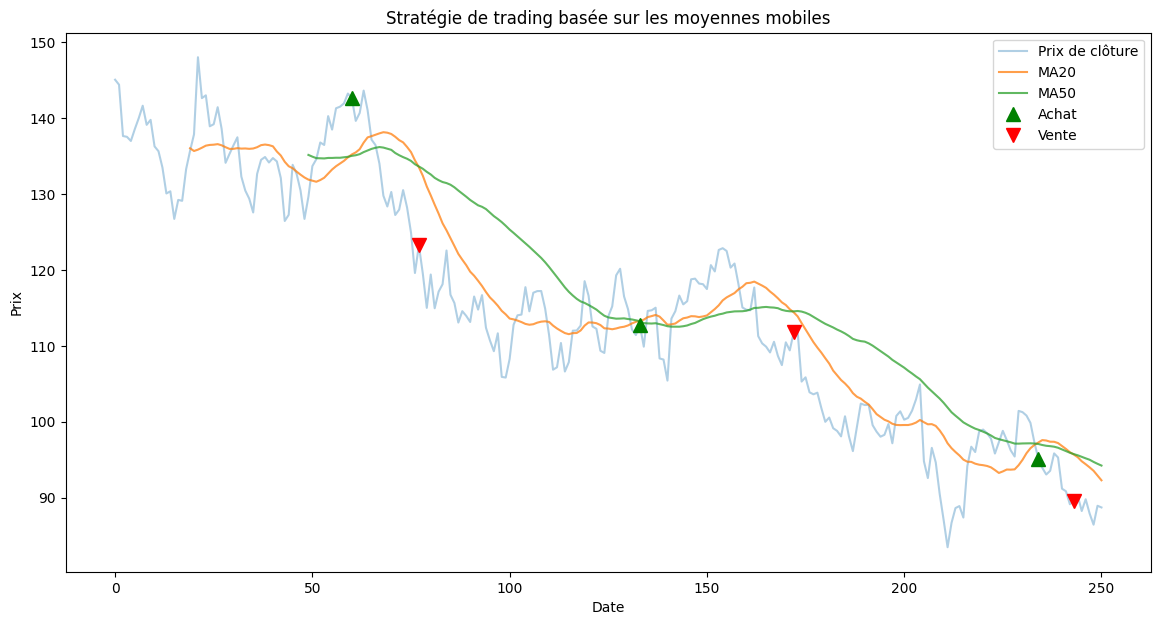

In [76]:

plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Prix de clôture', alpha=0.35)
plt.plot(df['MA20'], label='MA20', alpha=0.75)
plt.plot(df['MA50'], label='MA50', alpha=0.75)

plt.plot(df['achat'], '^', markersize=10, color='g', lw=0, label='Achat')

plt.plot(df['vente'], 'v', markersize=10, color='r', lw=0, label='Vente')

plt.title('Stratégie de trading basée sur les moyennes mobiles')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.legend()
plt.show()


In [81]:
df['Returns'] = df['Close'].pct_change()
df['Strategy_Returns'] = df['Position'].shift(1) * df['Returns']
sigma_p= df["Close"].std(ddof=1)

In [79]:
R_p = df["Strategy_Returns"].mean()

In [82]:
sharp_ratio = (R_p*100-2.5)/sigma_p

In [85]:
print(f"L'investissement a un rendement inférieur au rendement sans risque,car {sharp_ratio} < 0")

L'investissement a un rendement inférieur au rendement sans risque,car -0.15699280324705775 < 0
